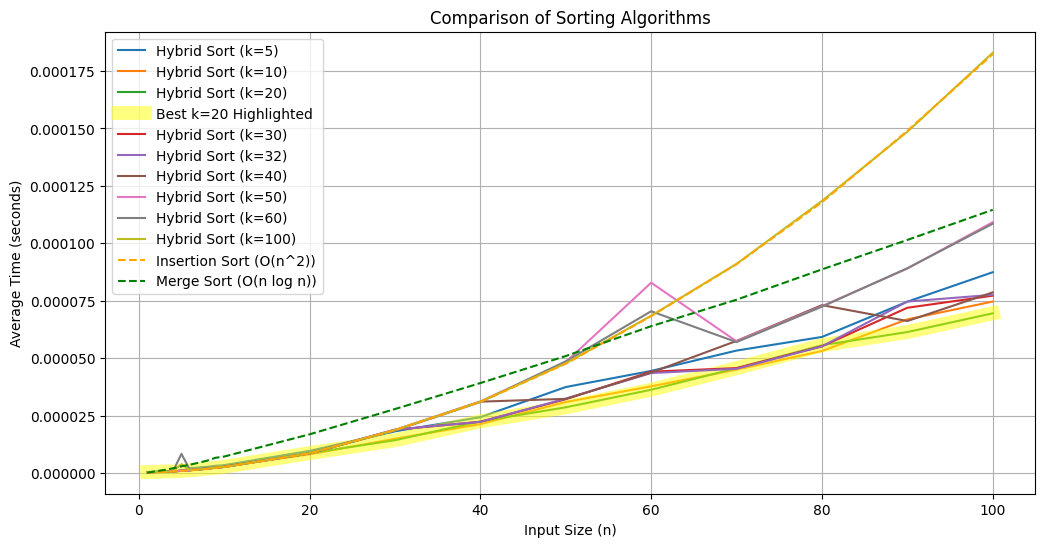

In [16]:
import time
import random
import matplotlib.pyplot as plt
import numpy as np

def merge_sort(arr):
    if len(arr) <= 1:
        return arr
    mid = len(arr) // 2
    left = merge_sort(arr[:mid])
    right = merge_sort(arr[mid:])
    return merge(left, right)

# Merge function
def merge(left, right):
    result = []
    i = j = 0
    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
    result.extend(left[i:])
    result.extend(right[j:])
    return result

# Merge Sort with Insertion Sort for small partitions
def tim_sort(arr, k=32):
    if len(arr) <= k:
        insertion_sort(arr)
        return arr
    mid = len(arr) // 2
    left = tim_sort(arr[:mid], k)
    right = tim_sort(arr[mid:], k)
    return merge(left, right)

# Insertion Sort Implementation
def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and arr[j] > key:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

# Experiment to find optimal k
def run_experiment():
    input_sizes = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    k_values = [5, 10, 20, 30, 32, 40, 50, 60, 100]
    tim_sort_times = {k: [] for k in k_values}
    insertion_sort_times = []
    merge_sort_times = []

    # Number of trials per input size
    trials = 1000

    for n in input_sizes:
        for k in k_values:
            # Initialize cumulative times
            tim_sort_time = 0

            for _ in range(trials):
                data = [random.randint(1, 10000) for _ in range(n)]

                # Time Tim Sort
                data_copy = data[:]
                start_time = time.time()
                tim_sort(data_copy, k)
                tim_sort_time += (time.time() - start_time)

            # Average time over trials for Tim Sort
            tim_sort_times[k].append(tim_sort_time / trials)

        # Time Insertion Sort
        insertion_sort_time = 0
        for _ in range(trials):
            data = [random.randint(1, 10000) for _ in range(n)]
            data_copy = data[:]
            start_time = time.time()
            insertion_sort(data_copy)
            insertion_sort_time += (time.time() - start_time)
        insertion_sort_times.append(insertion_sort_time / trials)

        # Time Merge Sort
        merge_sort_time = 0
        for _ in range(trials):
            data = [random.randint(1, 10000) for _ in range(n)]
            data_copy = data[:]
            start_time = time.time()
            merge_sort(data_copy)
            merge_sort_time += (time.time() - start_time)
        merge_sort_times.append(merge_sort_time / trials)

    # Calculate average time for each k
    average_tim_sort_times = {k: np.mean(tim_sort_times[k]) for k in k_values}
    
    # Determine the best k
    best_k = min(average_tim_sort_times, key=average_tim_sort_times.get)

    # Plotting results
    plt.figure(figsize=(12, 6))

    for k, times in tim_sort_times.items():
        # Plot the original line for each k
        # line_color = 'blue'  # Example color, you can vary this for different k values
        plt.plot(input_sizes, times, label=f"Hybrid Sort (k={k})")

        # Overlay the best k with a thick transparent yellow line
        if k == best_k:
            plt.plot(input_sizes, times, color='yellow', alpha=0.5, linewidth=10, 
                     label=f"Best k={k} Highlighted")

    plt.plot(input_sizes, insertion_sort_times, label="Insertion Sort (O(n^2))", linestyle='--', color='orange')
    plt.plot(input_sizes, merge_sort_times, label="Merge Sort (O(n log n))", linestyle='--', color='green')
    
    plt.xlabel("Input Size (n)")
    plt.ylabel("Average Time (seconds)")
    plt.title("Comparison of Sorting Algorithms")
    plt.legend()
    plt.grid()
    plt.savefig('out.png',dpi=300)
    plt.show()

   

# Run the experiment
run_experiment()
